<a href="https://colab.research.google.com/github/liz-lewis-manchester/CNM_2025_group_02/blob/group/groupmeeting_final_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This is a simulation calculator for the evolution of a pollutant concentration in a river
information needed for calculation: (ensure all inputs are +ve and non-zero)

 choose simulation initialization:
test case 1 : where x_max = 20m, spacial resolution Δx = 0.2m, Model time = 300s, temporal resolution Δt=10s, flow velocity U=0.1m s−1, concentration μg m−^3 250 at x=0, 0 elsewhere)
test case 2 : initialise data for x_max, Δx and concentration distribution is read from initial_conditions.csv, with Model time = 300s, temporal resolution Δt=10s, flow velocity U=0.1m s−1
test case 3 : manual inputs
choose simulation initialization:
which test do you wish to run?1
concentration distribution :
 [250.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.   0.
   0.   0.   0.  

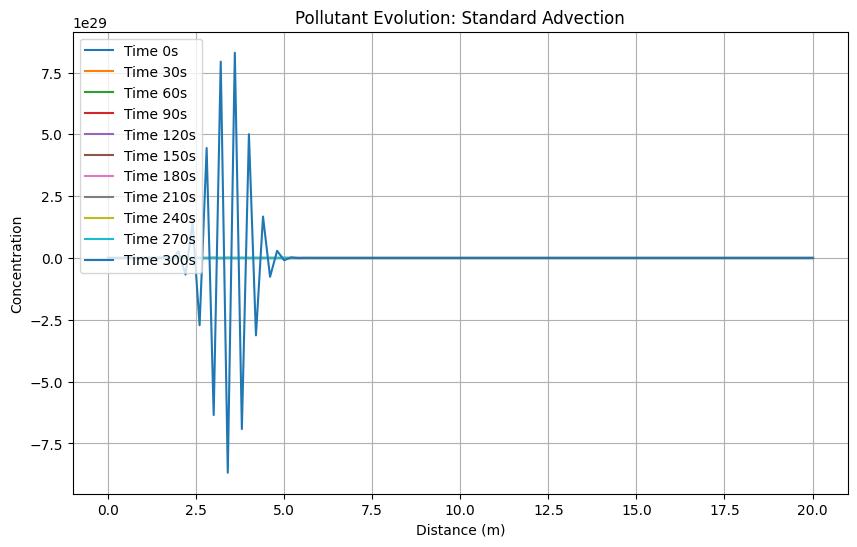

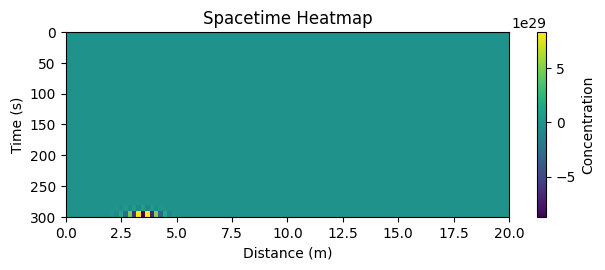

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def user_inputs():
  print("This is a simulation calculator for the evolution of a pollutant concentration in a river")
  print("information needed for calculation: (ensure all inputs are +ve and non-zero)")

  print("\n choose simulation initialization:")
  print("test case 1 : where x_max = 20m, spacial resolution Δx = 0.2m, Model time = 300s, temporal resolution Δt=10s, flow velocity U=0.1m s−1, concentration μg m−^3 250 at x=0, 0 elsewhere)")
  print("test case 2 : initialise data for x_max, Δx and concentration distribution is read from initial_conditions.csv, with Model time = 300s, temporal resolution Δt=10s, flow velocity U=0.1m s−1")
  print("test case 3 : manual inputs")
  print("choose simulation initialization:")
  choice = int(input("which test do you wish to run?"))

  if choice == 1:
    x_max = 20
    dx = 0.2
    U = 0.1
    t_max = 300
    dt = 10

    num_point = int(round(x_max / dx)) + 1 # calculates the number of points that x_max will have and concentration distribution will have

    x_grid = np.linspace(0, x_max, num_point)

    t_grid = np.arange(0, t_max + dt, dt)

    conc_distribution = np.zeros(num_point) # creating time grid
    conc_distribution[0] = 250.0



  elif choice == 2:

    x_max = 20
    dx = 0.2
    U = 0.1
    t_max = 300
    dt = 10

    num_point = int(round(x_max / dx)) + 1 # calculates the number of points that x_max will have and concentration distribution will have

    x_grid = np.linspace(0, x_max, num_point)
    t_grid = np.arange(0, t_max + dt, dt)
    conc_distribution = np.full(num_point, np.nan) # creates an arrazy with all values nan

    df = pd.read_csv('/content/initial_conditions.csv', encoding='latin1') # requires latin encoding as µ was resulting in UTF-8 error when reading the file
    x_csv = df.iloc[:, 0].values #locates and reads the first column knowing there is a title and to diregard it
    conc_csv = df.iloc[:, 1].values # locates and reads the second column and saves them as array

    for i in range(len(x_csv)):
      grid_location =int( x_csv[i] / dx) # calculates the index in that we will save our concentration to

      if 0 <= grid_location < num_point: # check to see data falls in our model grid and only allowing value assignement if the index exists
        conc_distribution[grid_location] = conc_csv[i] # fills in the concentration location that corresponds to the location where it is stated in csv file

    conc_series = pd.Series(conc_distribution) # converting the array in to a series to allow for panda operation to be done
    conc_distribution = conc_series.interpolate(method='linear', limit_direction='both').values # applying linear interpolation between the values where nan lies between them. as we set interpolation direction to both.

    print("data has successfully been interpolated.")


  elif choice == 3:
    x_max = int(input("what is the width of the model space (m) must be integer, x_max:"))
    dx = float(input("Enter the space increment value (spatial resolution) (m), dx:"))
    t_max = int(input("Enter the model run time (s) must be integer, t_max:"))
    dt = float(input("Enter the temporal resolution (s), dt:"))
    U = float(input("Enter the mean advective velocity (ms^-1), U:"))

    num_point = int(round(x_max / dx)) + 1 # calculates the number of points that x_max will have and concentration distribution will have

    x_grid = np.linspace(0, x_max, num_point)

    t_grid = np.arange(0, t_max + dt, dt)

    conc_distribution = np.zeros(num_point) # creating time grid

    if x_max <= 0 or dx <= 0 or t_max <= 0 or dt <= 0 or U <=0:
      print("Input error, ensure all inputs are +ve and non-zero integers")
      return user_inputs();

    elif x_max < dx or t_max < dt:
      print("either dt or dx have erroneous value")
      return user_inputs();

    else:
      for i in range(x_max):
        Conc_value = int(input(f"what is the start concentration at point x = {i}:"))
        conc_distribution[i] = Conc_value

  else:
    print("you entered an invalid character!")
    return user_inputs();


  print("concentration distribution :\n", conc_distribution)
  print("model space:\n", x_grid)
  print("model time:\n", t_max)

  simulation_data = {
    "x_max": x_max,
    "dx": dx,
    "t_max": t_max,
    "dt": dt,
    "U": U,
    "x_grid": x_grid,
    "t_grid": t_grid,
    "conc_distribution": conc_distribution
  }
  return simulation_data




def model_calculation(simulation_data):

  U = simulation_data["U"] # retrieving data from user input function that should be returned as parameters.
  dt = simulation_data["dt"] # asigning the data to short name variables to use in calulation
  dx = simulation_data["dx"]
  x_grid = simulation_data["x_grid"]
  t_grid = simulation_data["t_grid"]
  conc_current = simulation_data["conc_distribution"].copy()

  print("\n choose initialization for calculation")
  print("calculator 1 (for questions 1,2,3) : regular advection calculation done")
  print("calculator 2 (for questions 4) : advection calculation modelled with exponential decay of concentration with time")
  print("calculator 3 (for questions 5) : advection calculation with variable velocity profile")
  choice = int(input("which test do you wish to run?"))

  if choice == 1:
    calculated_result = np.zeros((len(t_grid), len(x_grid))) # creates a results table with rows as time steps and columns as distance from start

    print("we will use the advection equation: ∂𝜃/∂𝑡 = ― 𝑈 * ∂𝜃/∂𝑥")
    courant = U * dt / dx # calculate the courant number
    print("courant number:", courant)

    if courant > 1:
            print("courant is >1 which will result in unstable simulation. as you can see")

    calculated_result[0, :] = conc_current # saving the values for t=0 into the calculated result table

    for t in range(1, len(t_grid)): # starting the advection calculation loop starting at 1
      conc_new = conc_current.copy() # setting a copy of the concentraion distribution. to keep the original unchanged during calculation
      conc_new[1:] = conc_current[1:] - courant * (conc_current[1:] - conc_current[:-1]) #completing the advection calculation
      conc_new[0] = 0 # setting the boundary condtion, where we assume that all inflow is clean with 0 concentraion of pollutant.

      conc_current = conc_new # setting the current new concentratrion to the current for the next iteration
      calculated_result[t, :] = conc_current # saving the calculated concentration in the result matrix in its time row
      title = "Standard Advection"





  elif choice == 2:
    calculated_result = np.zeros((len(t_grid), len(x_grid))) # creates a results table with rows as time steps and columns as distance from start

    print("we will use the advection equation: ∂C/∂t ​+ U ∂C/∂x = 0 ​= −λC , where λ is the decay constant and so loss per second")
    courant = U * dt / dx # calculate the courant number
    print("courant number:", courant)
    lambda_ = float(input("what is the decay constant?"))

    if courant > 1:
            print("courant is >1 which will result in unstable simulation.")

    calculated_result[0, :] = conc_current

    for t in range(1, len(t_grid)):
      conc_new = conc_current.copy()
      conc_new[1:] = conc_current[1:] - courant * (conc_current[1:] - conc_current[:-1])  - (lambda_ * conc_current[1:] * dt) # advection equation with exponential decay
      conc_new[0] = 0

      conc_current = conc_new # setting the current new concentratrion to the current for the next iteration
      calculated_result[t, :] = conc_current # saving the calculated concentration in the result matrix in its time row
      title = f"Decay (lambda={lambda_})"


  elif choice == 3:
    calculated_result = np.zeros((len(t_grid), len(x_grid))) # creates a results table with rows as time steps and columns as distance from start

    print("we will use the advection equation: ∂C/∂t ​+ U(x,t) ∂C/∂x = 0 ")

    perturbation = float(input("enter the random perturbation factor (0 to 0.5)?"))

    noise = np.random.uniform(-perturbation, perturbation, len(x_grid)) # creates an array of random noise for each distance increment modeled

    u_grid = U *(1 + noise) # creates an array for the all the flow velocity values.
    u_grid = np.maximum(u_grid, 0.0) # ensures that u does not fall below 0

    courant_array = u_grid * dt / dx
    courant_max = np.max(courant_array)
    if courant_max > 1:
            print("courant is >1 which will result in unstable simulation.")

    print("courant number max:", courant_max)

    calculated_result[0, :] = conc_current

    for t in range(1, len(t_grid)):
      conc_new = conc_current.copy()
      conc_new[1:] = conc_current[1:] - courant_array[1:] * (conc_current[1:] - conc_current[:-1]) # advection equation with exponential decay
      conc_new[0] = 0


      conc_current = conc_new # setting the current new concentratrion to the current for the next iteration
      calculated_result[t, :] = conc_current # saving the calculated concentration in the result matrix in its time row

    title = f"Variable Velocity (Perturbation={perturbation})"
    print("u_grid :",u_grid)
  else:
    print("you entered an invalid character!")
    return user_inputs();

  print("calculated result:\n", calculated_result)
  plt.figure(figsize=(10, 6))
  step_size = max(1, len(t_grid) // 10)

  for t in range(0, len(t_grid), step_size):
      plt.plot(x_grid, calculated_result[t, :], label=f'Time {t_grid[t]:.0f}s')

  plt.title(f"Pollutant Evolution: {title}")
  plt.xlabel("Distance (m)")
  plt.ylabel("Concentration")
  plt.legend()
  plt.grid(True)
  plt.show()

  plt.subplot(2, 1, 2)
  # extent=[x_min, x_max, t_max, t_min] puts Time 0 at the top
  plt.imshow(calculated_result, aspect='auto', extent=[x_grid[0], x_grid[-1], t_grid[-1], t_grid[0]], cmap='viridis')
  plt.colorbar(label='Concentration')
  plt.title("Spacetime Heatmap")
  plt.xlabel("Distance (m)")
  plt.ylabel("Time (s)")

  plt.tight_layout()
  plt.show()


simulation_data = user_inputs();
model_calculation(simulation_data);